#  <center>  **시계열 자료분석 HW03(Midterm)**  </center> 

## <div style="text-align: right">  201822037 통계학과 한민주 </div> 

----

### 1. `stationery.txt`

어느 대형 문구점에서 30일 동안 판매한 문구류의 일별 판매액(단위 : 천원) 시계열자료이다.

In [6]:
## 필요한 package
library(forecast)
library(data.table)
library(lmtest) ## DW test 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [7]:
## 경로 지정
setwd("C:/Users/user/OneDrive/바탕 화면/전공 수업 자료/시계열자료분석_이영미/제5판_시계열분석/data")

In [6]:
sales = scan("stationery.txt")

In [79]:
sales_data = data.table( sales = sales , 
                       t = 1:length(sales))

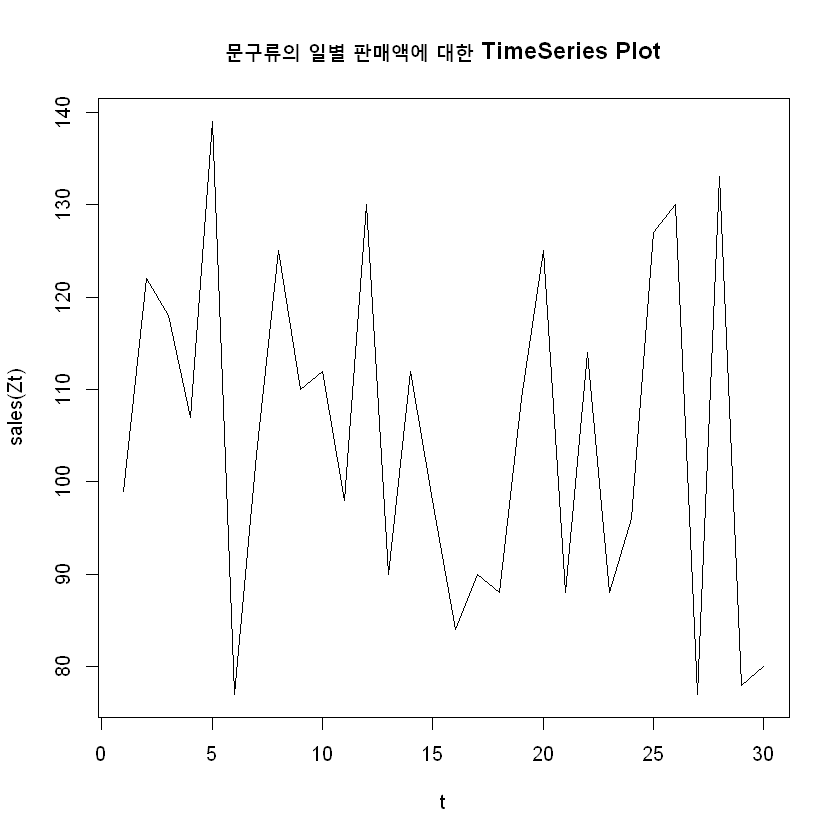

In [15]:
plot(sales_data$t , sales_data$sales , type = "l",
    xlab = "t"  , ylab = "sales(Zt)" , 
    main = "문구류의 일별 판매액에 대한 TimeSeries Plot")

추세와 계절성, 이분산성이 없어보이며 일정 수준에 머물면서 불규칙한 변화를 보이는 시계열 도표로 추세 모형 중 상수평균 모형을 적합하는 게 적당해 보인다.

#### 1-1) 상수평균모형 적합

$Z_t = \beta_0 + \epsilon_t$ , $\epsilon_t \sim N(0,\sigma^2)$ i.i.d.

In [38]:
model = lm(sales~1 , data = sales_data)

In [40]:
summary(model)


Call:
lm(formula = sales ~ 1, data = sales_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -27.9  -16.4    0.1   16.1   34.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    104.9        3.4   30.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.62 on 29 degrees of freedom


In [41]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Residuals,29,10054.7,346.7138,NA,NA


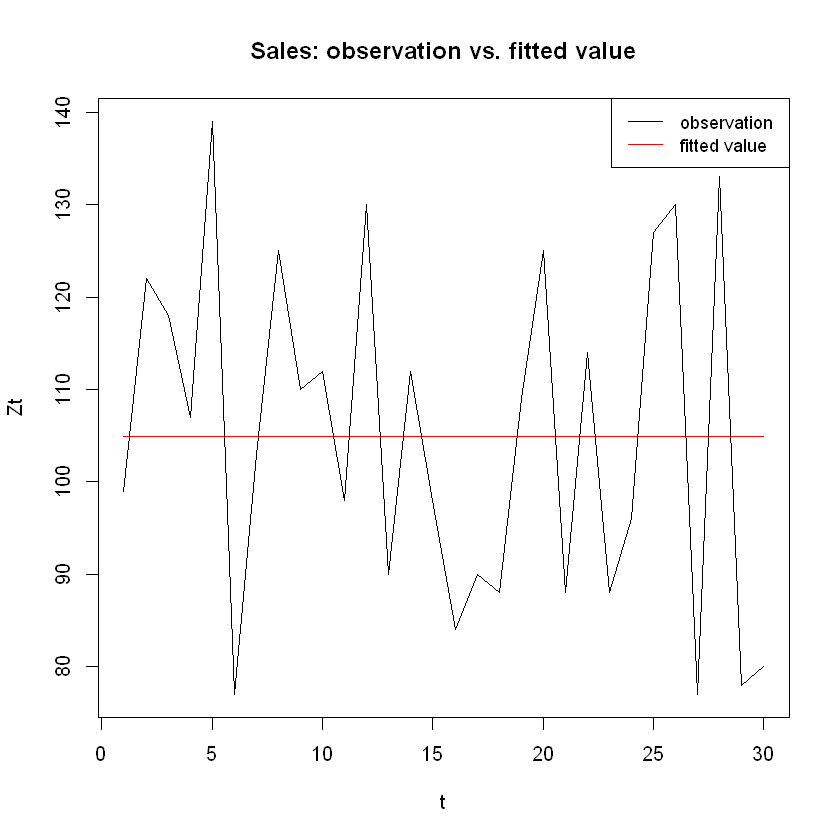

In [70]:
plot(sales_data$t , 
    sales_data$sales , 
    type = "l" , xlab = "t" , ylab = "Zt" , main = "Sales: observation vs. fitted value")
lines(sales_data$t , fitted(model) , col = "red")
legend("topright",legend=c("observation","fitted value"), lty = 1, col = c("black" , "red")
       ,border="white",box.lty=1,cex=0.9)

<center>  분산분석표    </center> 
    
|  | 자유도 | 제곱합 | 제곱평균 |  
|:---:|:---:|:---:|:---:|
| 오차 | 29 | 10054.7| 346.71| <br>

<center> 회귀계수 추정 결과 </center> 
    
|변수 | 회귀계수 | 표준오차 |  t-값 | 유의확률|
|:---:|:---:|:---:|:---:|:---:|
| $\hat{\beta_0}$| 104.9 | 3.4 | 30.86 | 0.0001| 

추정된 모형식은 $\widehat{Sales_t} = 104.9$ 이다. 회귀계수 $\hat{\beta_0}$의 유의확률이 0.001로 유의하다. 원시계열데이터와 상수평균모형에 의해 적합된 값을 도표에 그려보니 원시계열데이터가 적합된 값 104.9를 중심으로 왔다갔다하고 있다.

#### 1-2) 잔차분석

In [81]:
sales_data = sales_data[, fitted := fitted(model)] # 적합값 추가
sales_data = sales_data[, res := resid(model)]  # 잔차 추가

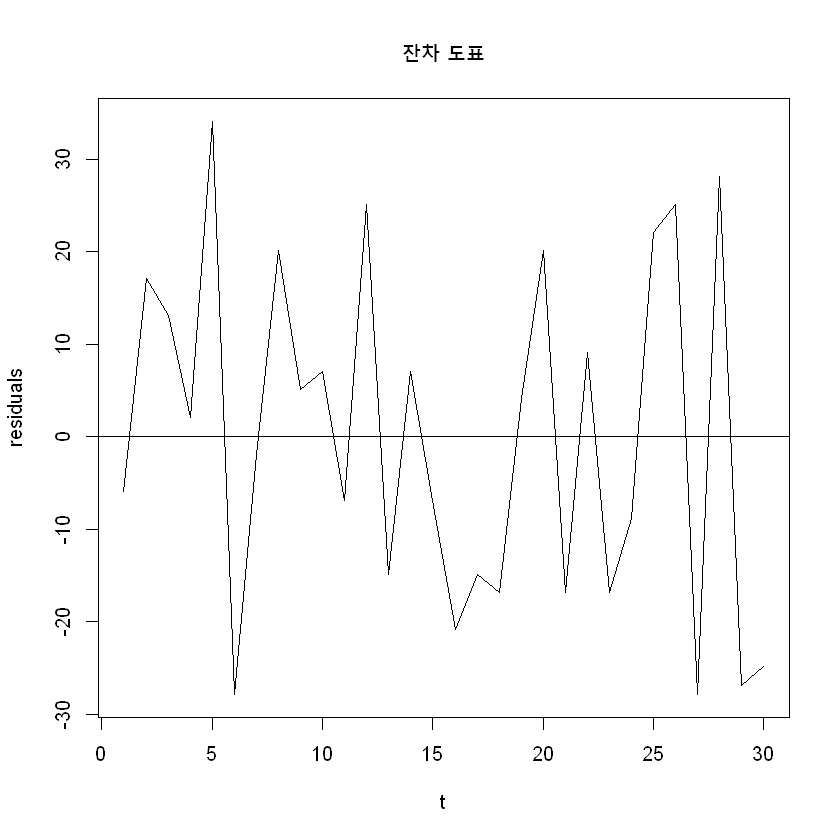

In [107]:
## 잔차 plot , 등분산성 검토
plot(sales_data$t , sales_data$res , type = "l" , 
    xlab = "t" , ylab = "residuals" , main = "잔차 도표")
abline( h =0)

In [98]:
## 선형성 검정
t.test(sales_data$res , mu =0 )


	One Sample t-test

data:  sales_data$res
t = -1.0454e-16, df = 29, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -6.952916  6.952916
sample estimates:
   mean of x 
-3.55387e-16 


In [100]:
## 독립성 검정
dwtest(model , alternative = "two.sided")


	Durbin-Watson test

data:  model
DW = 2.3954, p-value = 0.2693
alternative hypothesis: true autocorrelation is not 0



	Shapiro-Wilk normality test

data:  sales_data$res
W = 0.95093, p-value = 0.179


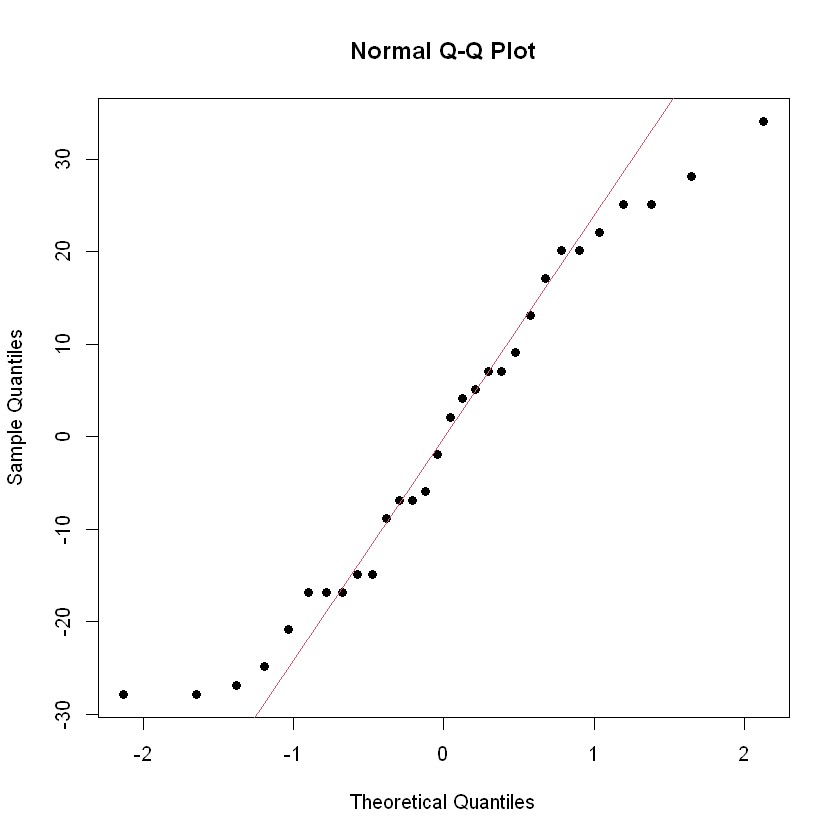

In [104]:
## 정규성 검정
qqnorm(sales_data$res , pch = 16)
qqline(sales_data$res , col = 2)

shapiro.test(sales_data$res)

오차항의 선형성을 검정하기 위해 T-test를 실시하였더니 유의확률이 1이다. 따라서 $H_0 : \mu = 0 \, vs. H_1 : \mu \neq 0$에서 영가설을 기각하지 못해 잔차의 평균이 0이고, 오차항의 선형성 가정이 만족된다.

오차항의 독립성을 검정하기 위해 Durbin-Watson test를 실시하였더니 DW 통계량이 2.3954, 유의확률이 0.2693이다. 따라서 $H_0 : \rho = 0  \, vs. H_1 : \rho \neq 0$에서 영가설을 기각하지 못해 잔차의 상관계수는 0이고, 오차항의 독립성 가정이 만족된다. 

오차항의 정규성을 살펴보기 위해 Q-Q plot을 봤더니 대부분의 데이터가 직선과 겹쳐지나 끝부분이 조금 의심스러워 shapiro-wilk test를 실시했다. 유의확률이 0.179이므로 $H_0 : 정규분포이다  \, vs. H_1 : 정규분포가 아니다$ 에서 영가설을 기각하지 못하여 오차항의 정규성 가정이 만족된다.

오차항의 등분산성을 살펴보기 위해 잔차 도표를 살펴보면 상수평균모형에 대한 잔차이므로 y축의 크기만 변하고, 형태는 시계열 도표와 동일하다. 0을 중심으로 일정한 범위 내에서 잔차가 왔다갔다하고 있으므로 오차항의 등분산성 가정에도 문제가 없어보인다.

#### 1-3) 예측값

상수평균 모형에서 예측값은 $\hat{Z_n}(l) = \hat{\beta_0}= \bar{Z}$ 이다.
따라서 $\hat{Z_{30}}(1) = \hat{Z_{30}}(2) = ... = \hat{Z_{30}}(12) = \hat{\beta_0} = 104.9$ 이다.

----

### 2. `data1.csv`

모의 실험에 의해 생성된 시계열 자료이다.

In [125]:
data1 = read.csv("data1.csv" )

In [126]:
data1 = data1[ , -1] # 필요없는 열 제거
data1 %>% head

,t,z
,<int>,<dbl>
1,1,-1.5346871
2,2,2.6850469
3,3,-0.4288189
4,4,1.3724199
5,5,-0.9800884
6,6,2.4156505


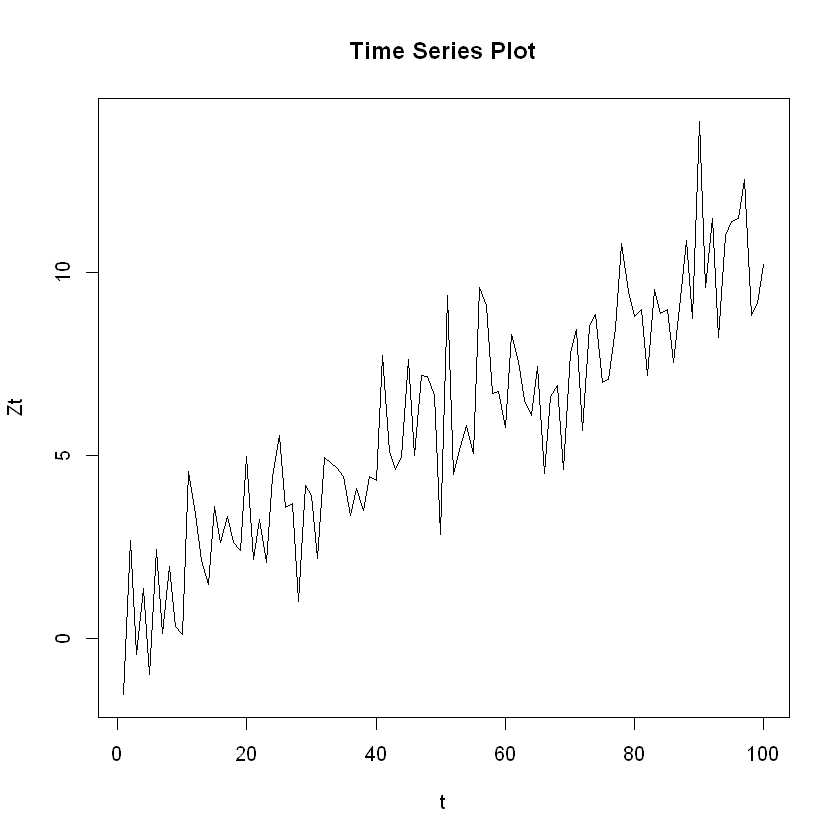

In [129]:
plot(data1$t , data1$z , type = "l", 
    xlab = "t" , ylab = "Zt" , 
    main = "Time Series Plot")

시계열 도표를 보니 계절성과 이분산성 없이 1차 선형추세만 있어보인다. 따라서 선형추세모형이나 이중지수평활법 모형을 적합하는 것이 좋을 거 같다.

#### 2-1) 선형추세모형 적합과 잔차분석

$Z_t = \beta_0 + \beta_1 + \epsilon_t$ , $\epsilon_t \sim N(0, \sigma^2)$ i.i.d.

In [130]:
model1 = lm(z~t , data = data1)

In [131]:
summary(model1)


Call:
lm(formula = z ~ t, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0803 -1.0287  0.0169  0.8426  4.3288 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.818932   0.296301   2.764  0.00682 ** 
t           0.099619   0.005094  19.557  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.47 on 98 degrees of freedom
Multiple R-squared:  0.796,	Adjusted R-squared:  0.7939 
F-statistic: 382.5 on 1 and 98 DF,  p-value: < 2.2e-16


In [132]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
t,1,826.9112,826.911178,382.458,1.326206e-35
Residuals,98,211.8855,2.162097,NA,NA


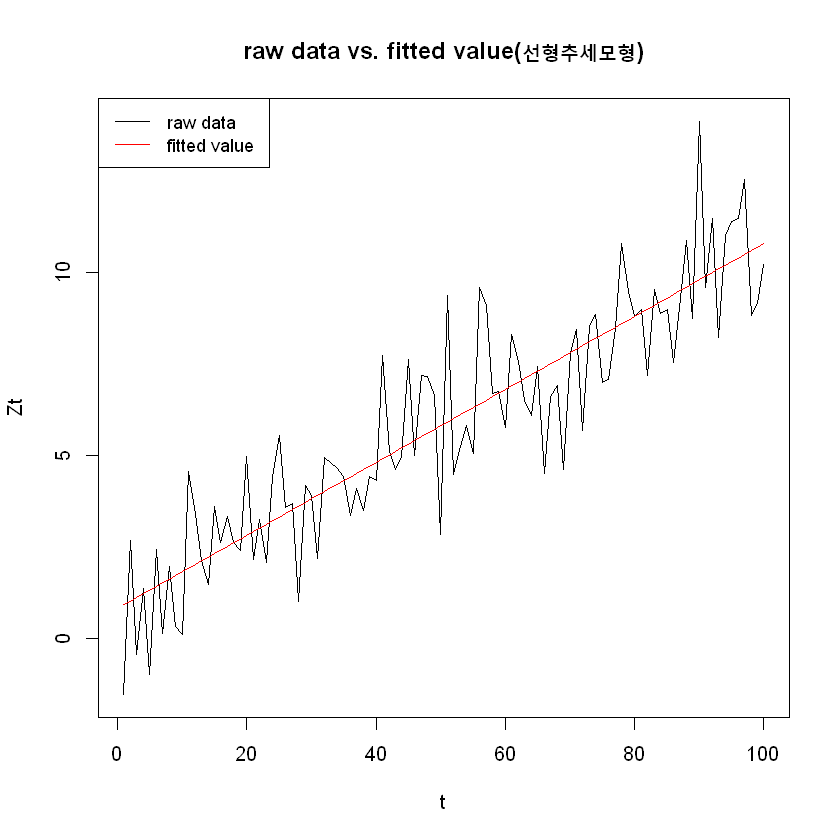

In [221]:
plot(data1$t , 
    data1$z , 
    type = "l" , xlab = "t" , ylab = "Zt" , main = "raw data vs. fitted value(선형추세모형)")
lines(data1$t , fitted(model1) , col = "red")
legend("topleft",legend=c("raw data","fitted value"), lty = 1, col = c("black" , "red")
       ,border="white",box.lty=1,cex=0.9)

<center>  분산분석표    </center> 
    
|  | 자유도 | 제곱합 | 제곱평균 | F값 | 유의확률|
|:---:|:---:|:---:|:---:|:---:|:---:|
| 모형 | 1 | 826.91| 826.91| 382.458 | 0.0001
| 오차 | 98 | 211.88| 2.16| ||
| 수정합 | 99 | 1038.79| | ||<br>


<center> 회귀계수 추정 결과 </center> 
    
|변수 | 회귀계수 | 표준오차 |  t-값 | 유의확률|
|:---:|:---:|:---:|:---:|:---:|
| Intercept | 0.8189| 0.2963 | 2.764 | 0.00682| 
| t | 0.0996 | 0.0050 | 19.557| 0.0001 |

추정된 모형식은 $\hat{Z_t} = 0.8189 + 0.0996 \times t$ 이다. 따라서 1시차가 증가하면 위 시계열데이터는 0.0996만큼 증가한다.<br>
각 회귀계수 $\hat{\beta_0}$, $\hat{\beta_1}$의 유의확률은 유의수준 0.01하에서 유의하다. F-통계량은 382.5이고, 유의수준이 0.001 이하이므로 유의수준 0.01 하에서 회귀모형 역시 유의하다. 회귀모형의 설명력은 $R^2 = 79.6%$로 괜찮은 설명력을 가졌다. <br>
원시계열데이터와 선형추세모형에 의해 적합된 값을 도표에 그려보니 원시계열 데이터의 추세를 적합한 모형이 잘 따라가고 있다.

In [140]:
### 잔차분석
data1 = as.data.table(data1)
data1 = data1[ , fitted := fitted(model1)]
data1 = data1[, res := resid(model1)]

In [142]:
data1 %>% head

t,z,fitted,res
<int>,<dbl>,<dbl>,<dbl>
1,-1.5346871,0.918551,-2.4532381
2,2.6850469,1.018170,1.6668770
3,-0.4288189,1.117789,-1.5466077
4,1.3724199,1.217408,0.1550122
5,-0.9800884,1.317027,-2.2971150
6,2.4156505,1.416646,0.9990050


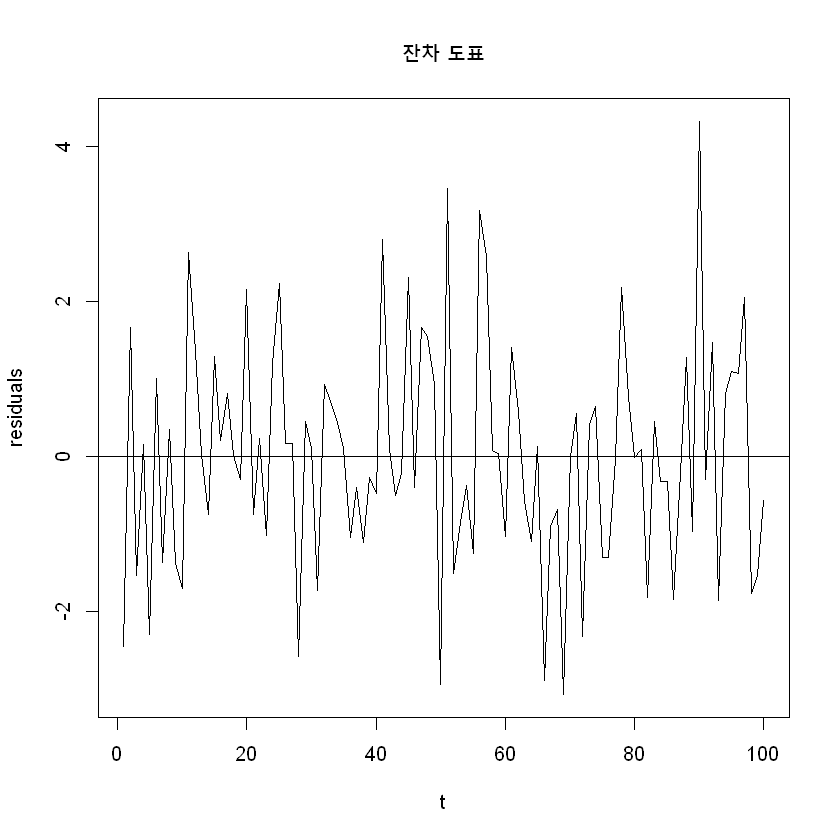

In [143]:
## 잔차 plot , 등분산성 검토
plot(data1$t , data1$res , type = "l" , 
    xlab = "t" , ylab = "residuals" , main = "잔차 도표")
abline( h =0)

In [145]:
## 등분산성 검정
bptest(model1)


	studentized Breusch-Pagan test

data:  model1
BP = 0.28654, df = 1, p-value = 0.5924


In [147]:
## 선형성 검정
t.test(data1$res , mu =0 )


	One Sample t-test

data:  data1$res
t = -3.7755e-16, df = 99, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2902834  0.2902834
sample estimates:
    mean of x 
-5.523414e-17 


In [148]:
## 독립성 검정
dwtest(model1 , alternative = "two.sided")


	Durbin-Watson test

data:  model1
DW = 2.2164, p-value = 0.3221
alternative hypothesis: true autocorrelation is not 0



	Shapiro-Wilk normality test

data:  data1$res
W = 0.98926, p-value = 0.6049


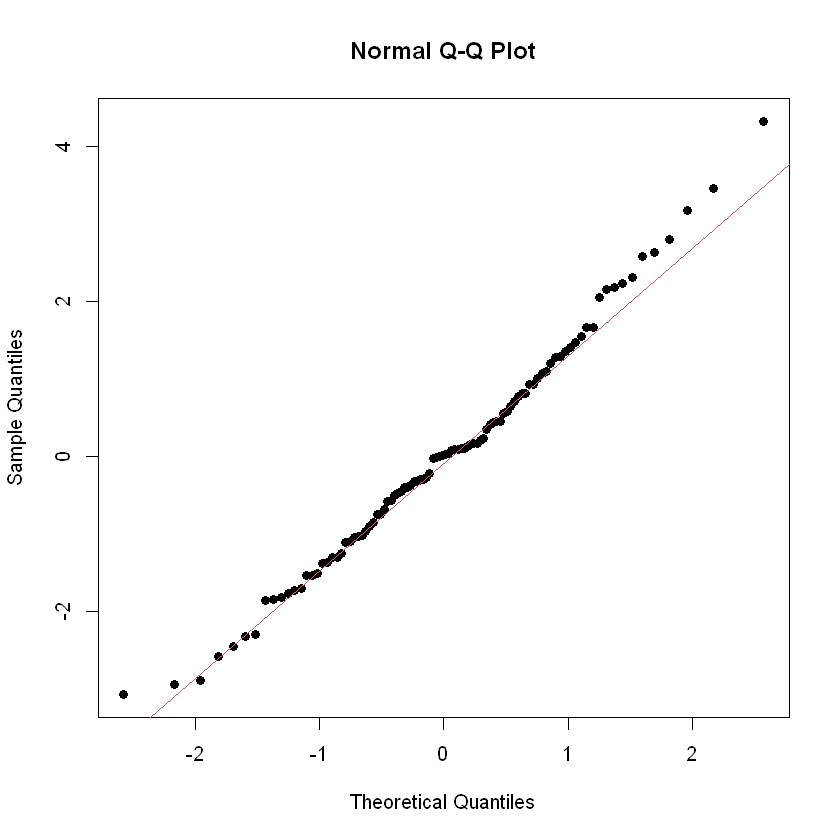

In [151]:
## 정규성 검토
qqnorm(data1$res , pch = 16)
qqline(data1$res , col = 2)

shapiro.test(data1$res)

오차항의 선형성을 검정하기 위해 T-test를 실시하였더니 유의확률이 1이다. 따라서 $H_0 : \mu = 0 \, vs. H_1 : \mu \neq 0$에서 영가설을 기각하지 못해 잔차의 평균이 0이고, 오차항의 선형성 가정이 만족된다.

오차항의 독립성을 검정하기 위해 Durbin-Watson test를 실시하였더니 DW 통계량이 2.2164, 유의확률이 0.3221이다. 따라서 $H_0 : \rho = 0  \, vs. H_1 : \rho \neq 0$에서 영가설을 기각하지 못해 잔차의 상관계수는 0이고, 오차항의 독립성 가정이 만족된다. 

오차항의 정규성을 살펴보기 위해 Q-Q plot을 봤더니 대부분의 데이터가 직선과 겹쳐지고 있으므로 오차항의 정규성 가정이 만족된다.

오차항의 등분산성을 살펴보기 위해 잔차 도표를 살펴보면 0을 중심으로 움직이고 있으나 t가 커질수록 분산도 커지는 이분산성이 조금 의심되었다. 따라서 Breusch-Pagan의 등분산성 검정을 실시했다. 유의확률이 0.5924이므로 $H_0 : 등분산이다 \, vs. H_1: 이분산이다$ 에서 영가설을 기각하지 못하여 오차항의 등분산성이 만족된다.

#### 2-2) 선형추세모형에서의 예측값

선형추세모형에서의 예측값은 $\hat{Z_n}(l) = \hat{\beta_0} + \hat{\beta_1} \times (n+l)$ 이다. <br>
따라서 $\hat{Z_{100}}(l) = 0.8189 + 0.0996 \times (100 + l)$ 이므로


$\hat{Z_{100}}(1) = 0.8189 + 0.0996 \times 101 = 10.88$ <br>
$\hat{Z_{100}}(2) = 0.8189 + 0.0996 \times 102 = 10.98$ <br>
$\hat{Z_{100}}(3) = 0.8189 + 0.0996 \times 103 = 11.08$ <br>
$\hat{Z_{100}}(4) = 0.8189 + 0.0996 \times 104 = 11.179$ <br>
$\hat{Z_{100}}(5) = 0.8189 + 0.0996 \times 105 = 11.279$ <br>
$\hat{Z_{100}}(6) = 0.8189 + 0.0996 \times 106 = 11.379$ <br>
$\hat{Z_{100}}(7) = 0.8189 + 0.0996 \times 107 = 11.478$ <br>
$\hat{Z_{100}}(8) = 0.8189 + 0.0996 \times 108 = 11.578$ <br>
$\hat{Z_{100}}(9) = 0.8189 + 0.0996 \times 109 = 11.677$ <br>
$\hat{Z_{100}}(10) = 0.8189 + 0.0996 \times 110 = 11.777$ 이다.

In [249]:
beta0 = coef(model1)[1]
beta1 = coef(model1)[2]

pred1 = beta0 + beta1*(101:110)
round(pred1,3)

[1] 10.880 10.980 11.080 11.179 11.279 11.379 11.478 11.578 11.677 11.777

#### 2-3) 이중지수평활법 적합과 잔차분석

In [167]:
data1 %>% head

t,z,fitted,res
<int>,<dbl>,<dbl>,<dbl>
1,-1.5346871,0.918551,-2.4532381
2,2.6850469,1.018170,1.6668770
3,-0.4288189,1.117789,-1.5466077
4,1.3724199,1.217408,0.1550122
5,-0.9800884,1.317027,-2.2971150
6,2.4156505,1.416646,0.9990050


In [210]:
model2 = holt(data1$z , h=10)
model2$model ## alpha, beta는 자체적으로 추정하도록 함

Holt's method 

Call:
 holt(y = data1$z, h = 10) 

  Smoothing parameters:
    alpha = 0.0427 
    beta  = 1e-04 

  Initial states:
    l = 0.1376 
    b = 0.1041 

  sigma:  1.5238

     AIC     AICc      BIC 
550.6720 551.3103 563.6979 

In [212]:
model2$fitted %>% head

A Time Series:
[1] 0.2417246 0.2698393 0.4771576 0.5425865 0.6822093 0.7152638

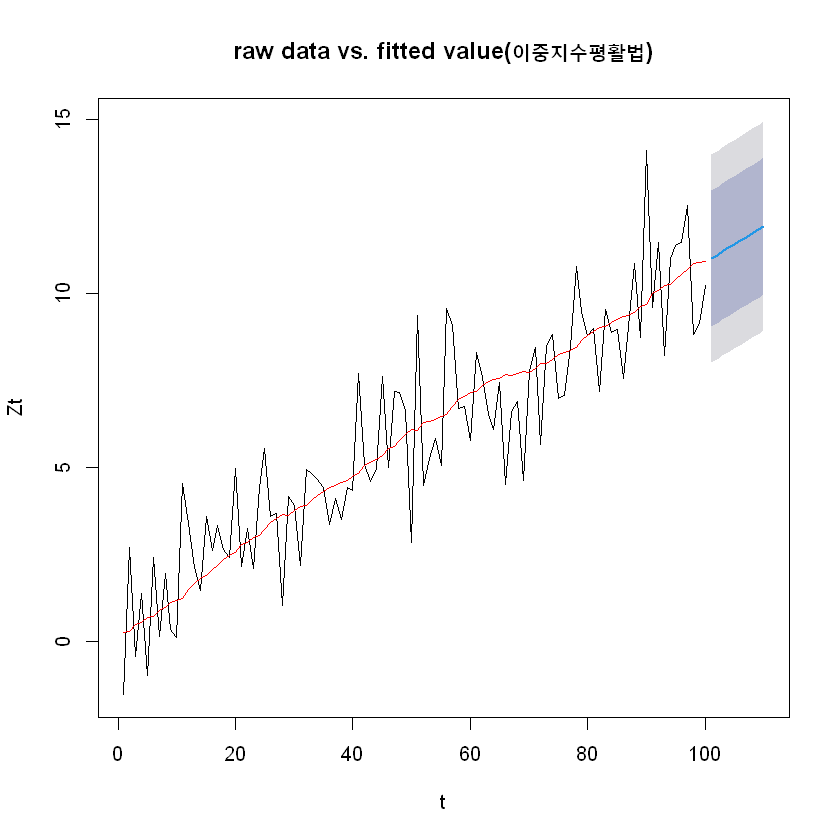

In [217]:
plot(model2 , xlab = "t" , ylab = "Zt" , 
    main = "raw data vs. fitted value(이중지수평활법)")
lines(fitted(model2), col= "red")

초기평활값 $S_0^{(1)} = 0.1376, S_0^{(2)}=0.1041$이다. 평활상수는 $\alpha = 0.0427 , \beta = 1e-04$ 가 사용되었다. 적합된 선이 원데이터에서 추세를 잘 따라가고 있는 것처럼 보인다.

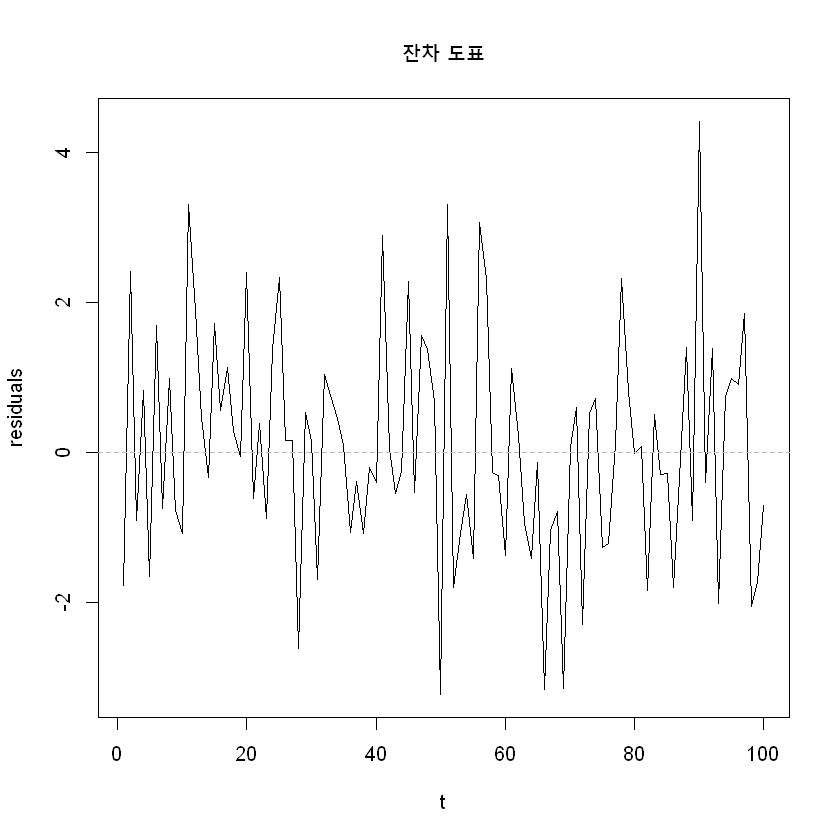

In [224]:
#### 잔차분석
## 등분산성 검토
plot(resid(model2) , type = "l" , xlab = "t" , ylab = "residuals" , 
    main = "잔차 도표")
abline(h = 0 , lty =2 , col= "grey")

In [225]:
## 선형성 검정
t.test(resid(model2) , mu = 0)


	One Sample t-test

data:  resid(model2)
t = 0.39227, df = 99, p-value = 0.6957
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2386872  0.3563151
sample estimates:
 mean of x 
0.05881397 


In [226]:
## 독립성 검정
dwtest(lm(resid(model2)~1))


	Durbin-Watson test

data:  lm(resid(model2) ~ 1)
DW = 2.203, p-value = 0.8474
alternative hypothesis: true autocorrelation is greater than 0



	Shapiro-Wilk normality test

data:  resid(model2)
W = 0.98994, p-value = 0.6598


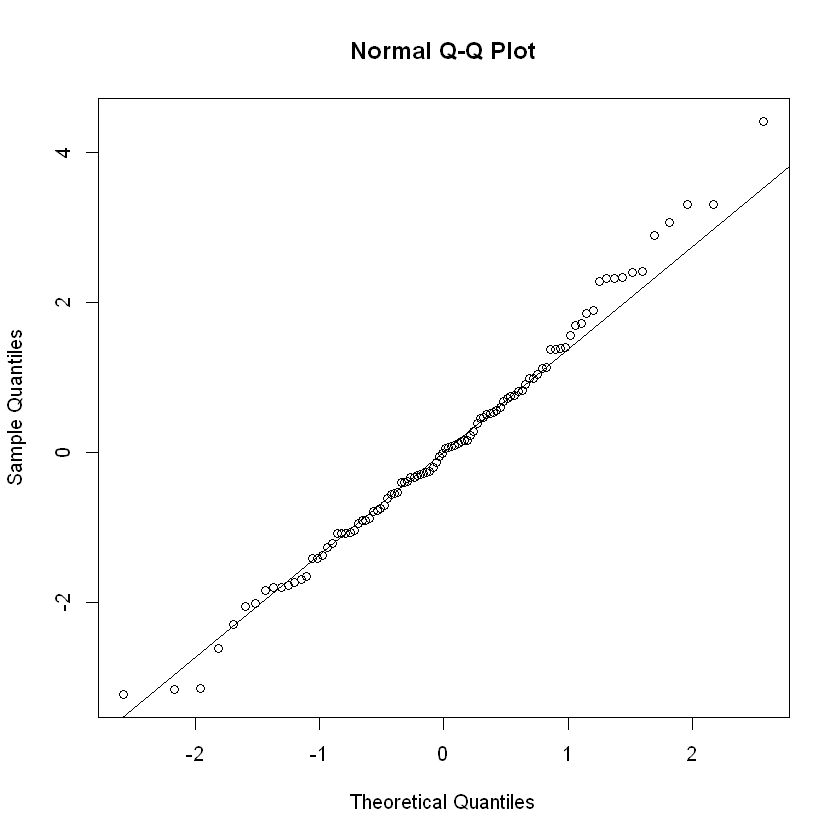

In [227]:
## 정규성 검토
qqnorm(resid(model2))
qqline(resid(model2))

shapiro.test(resid(model2))

오차항의 선형성을 검정하기 위해 T-test를 실시하였더니 유의확률이 0.6957이다. 따라서 $H_0 : \mu = 0 \, vs. H_1 : \mu \neq 0$에서 영가설을 기각하지 못해 잔차의 평균이 0이고, 오차항의 선형성 가정이 만족된다.

오차항의 독립성을 검정하기 위해 Durbin-Watson test를 실시하였더니 DW 통계량이 2.203, 유의확률이 0.8474이다. 따라서 $H_0 : \rho = 0  \, vs. H_1 : \rho \neq 0$에서 영가설을 기각하지 못해 잔차의 상관계수는 0이고, 오차항의 독립성 가정이 만족된다. 

오차항의 정규성을 살펴보기 위해 Q-Q plot을 봤더니 대부분의 데이터가 직선과 겹쳐지고 있으므로 오차항의 정규성 가정이 만족된다. 

오차항의 등분산성을 살펴보기 위해 잔차 도표를 살펴보면 일정한 범위 내에서 0을 중심으로 움직이고 있으며, 선형추세모형의 잔차 도표와 비교했을 때 이분산성처럼 보였던 분산 변동이 완화된 것처럼 보인다. 따라서 오차항의 등분산성 가정이 만족된 것처럼 보인다.

#### 2-4) 이중지수평활모형에서의 예측값

이중지수평활 모형에서 예측값은 $\hat{Z_n}(l) = \hat{\beta_{0,n}} + \hat{\beta_{1,n}}\times (n+l)$이다.

위의 이중지수평활모형으로 예측된 값은 

$\hat{Z_{100}}(1) = 10.990$ <br>
$\hat{Z_{100}}(2) = 11.095$ <br>
$\hat{Z_{100}}(3) = 11.200$ <br>
$\hat{Z_{100}}(4) = 11.304$ <br>
$\hat{Z_{100}}(5) = 11.409$ <br>
$\hat{Z_{100}}(6) = 11.514$ <br>
$\hat{Z_{100}}(7) = 11.618$ <br>
$\hat{Z_{100}}(8) = 11.723$ <br>
$\hat{Z_{100}}(9) = 11.828$ <br>
$\hat{Z_{100}}(10) = 11.933$ 이다. 

In [255]:
pred2 = as.data.table(predict(model2))[,1]
pred2 = as.vector(pred2)
round(pred2,3)

Point Forecast
<dbl>
10.990
11.095
11.200
11.304
11.409
11.514
11.618
11.723
11.828


#### 2-4) `data1_new.csv`

In [259]:
data1_new = read.csv("data1_new.csv")
data1_new = data1_new[ , -1]
data1_new

t,z
<int>,<dbl>
101,11.577471
102,13.171004
103,12.730258
104,12.242375
105,10.877077
106,13.297355
107,14.632224
108,15.049088
109,9.671734


In [277]:
## 선형추세모형
sse1 = (data1_new$z - pred1)**2 %>% sum

## 이중지수평활모형
sse2 = (data1_new$z - pred2)**2 %>% sum

print(paste("선형추세모형에서의 오차합:" , round(sse1,3)))
print(paste("이중지수평활모형에서의 오차합:", round(sse2,3)))

[1] "선형추세모형에서의 오차합: 39.198"
[1] "이중지수평활모형에서의 오차합: 36.218"


어떤 모형이 더 예측을 잘 했는지 보기 위해 새로운 데이터와 예측한 값에 대한 오차합(실제값-예측값 의 합)을 보았다.
선형추세모형에서의 오차합은 39.198 이고, 이중지수평활모형에서의 오차합은 36.218이므로 오차합이 더 작은 이중지수평활모형이 예측을 목적으로 할 때 더 적합하다.

----

### 3. `usapass.txt`

미국 월별 비행기 승객 수(단위: 천 명)의 시계열 자료이다.

In [313]:
data = scan("usapass.txt")
usapass = ts(data , frequency = 12 , start = c(2000,1))
usapass

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,112,118,132,129,121,135,148,148,136,119,104,118
2001,115,126,141,135,125,149,170,170,158,133,114,140
2002,145,150,178,163,172,178,199,199,184,162,146,166
2003,171,180,193,181,183,218,230,242,209,191,172,194
2004,196,196,236,235,229,243,264,272,237,211,180,201
2005,204,188,235,227,234,264,302,293,258,229,203,229
2006,242,233,267,269,270,315,364,347,312,274,237,278
2007,284,277,317,313,318,374,413,405,355,306,271,306
2008,315,301,362,348,363,435,491,505,404,359,310,337
2009,340,318,362,348,363,435,491,505,404,359,310,337


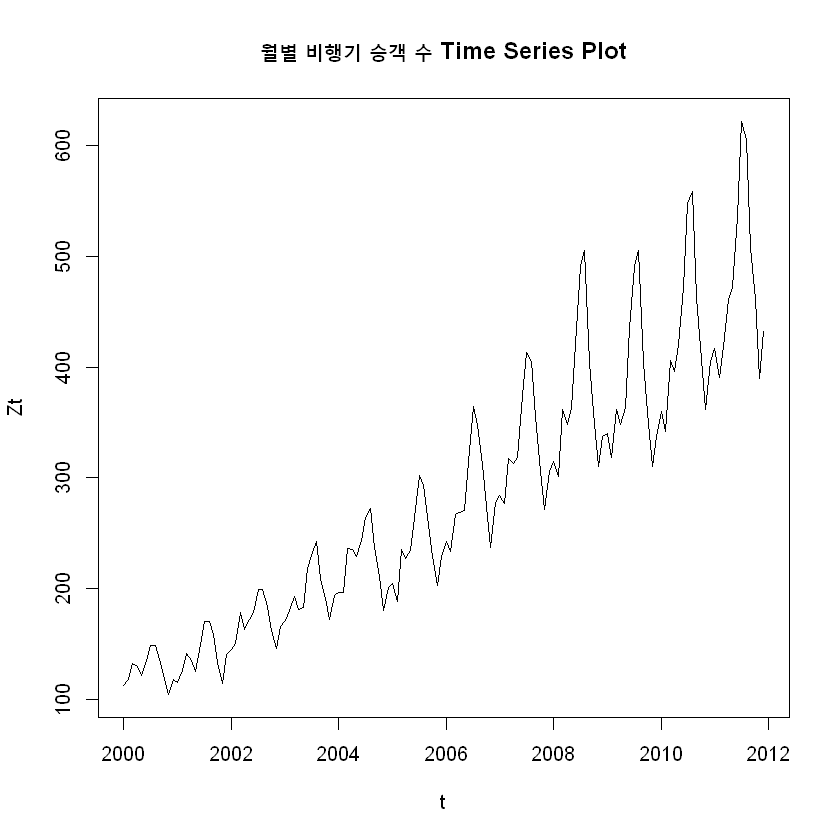

In [314]:
plot(usapass , xlab = "t" , ylab = "Zt" , main = "월별 비행기 승객 수 Time Series Plot")

In [315]:
usa_data = data.table(
    day = seq.Date(as.Date("2000-01-01") , by="month" , length.out = length(data)) , 
    usapass = data)

usa_data %>% head

day,usapass
<date>,<dbl>
2000-01-01,112
2000-02-01,118
2000-03-01,132
2000-04-01,129
2000-05-01,121
2000-06-01,135


In [316]:
usa_data = usa_data[ , log_usapass := log(data)]
usa_data %>% head

day,usapass,log_usapass
<date>,<dbl>,<dbl>
2000-01-01,112,4.718499
2000-02-01,118,4.770685
2000-03-01,132,4.882802
2000-04-01,129,4.859812
2000-05-01,121,4.795791
2000-06-01,135,4.905275


시계열 도표를 보니 추세와 계절성, 시간에 따른 분산의 변동(이분산성)이 있어보인다. 따라서 log변환 후 선형계절추세모형이나 계절지수평활법 혹은 분해법을 사용하는 것이 적절해 보인다.

#### 3-1) log변환이 필요한 이유

시계열 도표를 보면 계절성분의 진폭이 시계열의 수준에 따라 증가하고 있다. 따라서 이 데이터에는 이분산성이 있다. <br>
추세모형과 평활법에는 오차항의 등분산성 가정이 있으므로 이에 위배되지 않으려면 log변환을 통해 뒤쪽 데이터의 이분산성을 완화시켜주는 분산안정화 과정을 거쳐야 한다.

#### 3-2) 선형계절추세모형 적합과 잔차분석

In [328]:
## 주기와 추세에 대한 설명변수 만들기
usa_data= usa_data[ , s := factor(rep(1:12 , 12)) ]
usa_data= usa_data[ , Trend := 1:length(data)]

usa_data %>% head

day,usapass,log_usapass,s,Trend
<date>,<dbl>,<dbl>,<fct>,<int>
2000-01-01,112,4.718499,1,1
2000-02-01,118,4.770685,2,2
2000-03-01,132,4.882802,3,3
2000-04-01,129,4.859812,4,4
2000-05-01,121,4.795791,5,5
2000-06-01,135,4.905275,6,6


In [329]:
## 지시함수를 사용한 선형계절추세모형 적합 , B0=0을 가정
model_31 = lm(log_usapass ~ 0 +Trend + s , data = usa_data)
summary(model_31)


Call:
lm(formula = log_usapass ~ 0 + Trend + s, data = usa_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.159814 -0.044426  0.000623  0.045572  0.151846 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
Trend 0.0100999  0.0001252   80.67   <2e-16 ***
s1    4.7246982  0.0198289  238.27   <2e-16 ***
s2    4.7026123  0.0198822  236.52   <2e-16 ***
s3    4.8342011  0.0199361  242.49   <2e-16 ***
s4    4.8015084  0.0199907  240.19   <2e-16 ***
s5    4.8009618  0.0200459  239.50   <2e-16 ***
s6    4.9237482  0.0201017  244.94   <2e-16 ***
s7    5.0296649  0.0201582  249.51   <2e-16 ***
s8    5.0223242  0.0202153  248.44   <2e-16 ***
s9    4.8708171  0.0202729  240.26   <2e-16 ***
s10   4.7357833  0.0203312  232.93   <2e-16 ***
s11   4.5905564  0.0203901  225.14   <2e-16 ***
s12   4.7032829  0.0204496  229.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06224 on 131 degrees of freedom
Multip

In [345]:
usa_data = usa_data[ , fitted1 := fitted(model_31)]

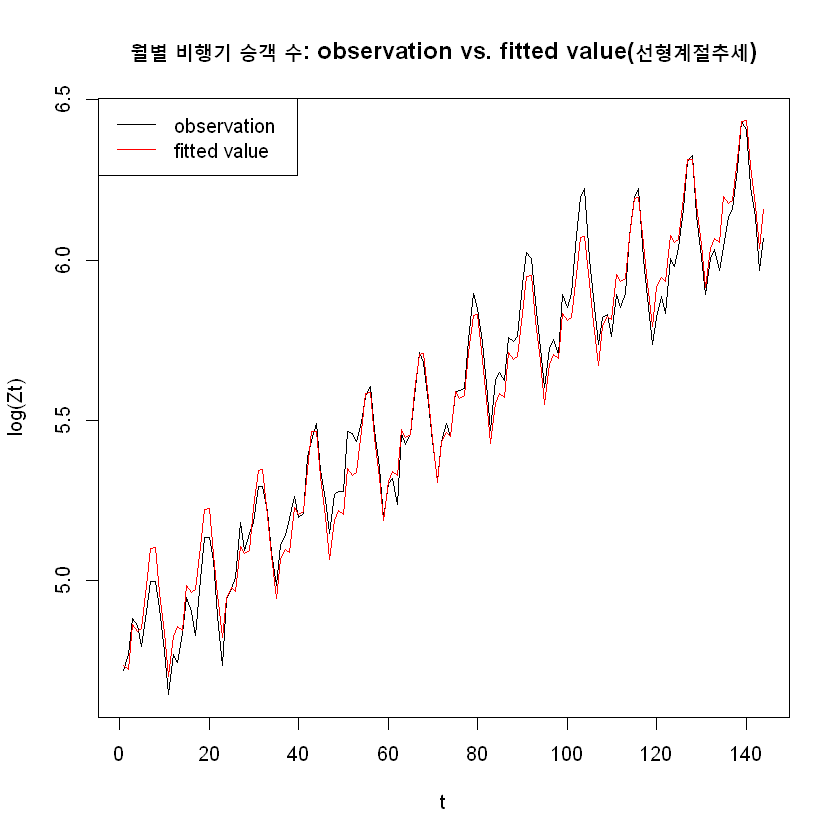

In [354]:
plot(usa_data$log_usapass , type = "l", 
     xlab = "t" , ylab = "log(Zt)" , 
     main = "월별 비행기 승객 수: observation vs. fitted value(선형계절추세)")
lines(usa_data$fitted1 , col = "red")
legend("topleft",legend=c("observation","fitted value"), lty = 1, col = c("black" , "red")
       ,border="white",box.lty=1,cex=1.0)

<center> 회귀계수 추정 결과 </center> 
    
|변수 | 회귀계수 | 표준오차 |  t-값 | 유의확률|
|:---:|:---:|:---:|:---:|:---:|
|Trend |0.01010| 0.00012 |  80.67  | 0.0001 | 
|s1   | 4.72469 | 0.01982 | 238.27   | 0.0001|
|s2    |4.70261  |0.01988  | 236.52   | 0.0001| 
|s3    |4.83420  |0.01993   | 242.49   | 0.0001|
|s4   | 4.80150  |0.01999  | 240.19  | 0.0001|
|s5   | 4.80096  |0.02004   | 239.50   | 0.0001|
|s6   | 4.92374  |0.02010  | 244.94   | 0.0001 |
|s7   | 5.02966  |0.02015   | 249.51   | 0.0001 |
|s8   | 5.02232 |  0.02021  | 248.44   | 0.0001 |
|s9   | 4.87081  | 0.02027   | 240.26   | 0.0001 |
|s10  | 4.73578 | 0.02033  | 232.93   | 0.0001 |
|s11  | 4.59055 | 0.02039  | 225.14   | 0.0001 | 
|s12  | 4.70328 | 0.02044  | 229.99  | 0.0001 |

로그변환된 데이터에 계절형 지시함수를 이용하여 선형계절추세모형을 적합시켰다. 추세를 잡아주기 위해 매월 1씩 증가하는 시간변수 Trend를 독립변수로 쓰고 , 계절성을 잡아주기 위해 12개의 지시함수를 독립변수로 쓴다. 모수들 사이의 가정은 $\beta_0 = 0$으로 주었다.

적합 결과 변수 Trend와 각 계절에 해당하는 지시함수들이 모두 유의확률 0.0001 이하로 유의하다. 
F-통계량에 대한 유의확률도 0.0001 이하로 유의하여 이 모형 자체도 유의하다. 
모형의 설명력은 $R^2 = 99.99%$로 매우 충분히 데이터를 설명하고 있다. 

Trend의 회귀계수를 보면 log(비행기 승객 수)는 매월 0.01씩 증가함을 알 수 있다. 
또한 각 계절의 지시함수들에 대한 회귀계수는  해당 월별 log(비행기 승객 수)의 평균을 의미한다.

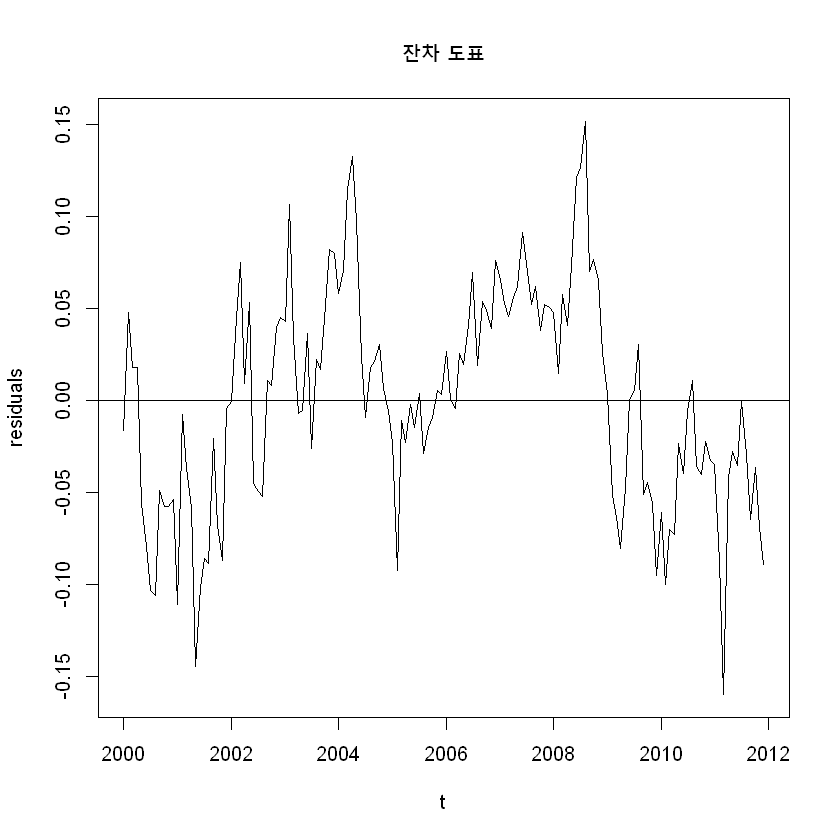

In [357]:
## 잔차 분석 , 등분산성 검토 
plot(usa_data$day , resid(model_31) ,type = "l", 
    xlab = "t" , ylab = "residuals" , main = "잔차 도표")
abline(h = 0)

In [359]:
bptest(model_31)


	studentized Breusch-Pagan test

data:  model_31
BP = 5.9163, df = 12, p-value = 0.9202


In [367]:
# 독립성 검정
dwtest(model_31 , alternative = "greater")


	Durbin-Watson test

data:  model_31
DW = 0.40831, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [365]:
# 선형성 검정
t.test(resid(model_31) , mu =0)


	One Sample t-test

data:  resid(model_31)
t = -4.4287e-17, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.009812747  0.009812747
sample estimates:
    mean of x 
-2.198521e-19 


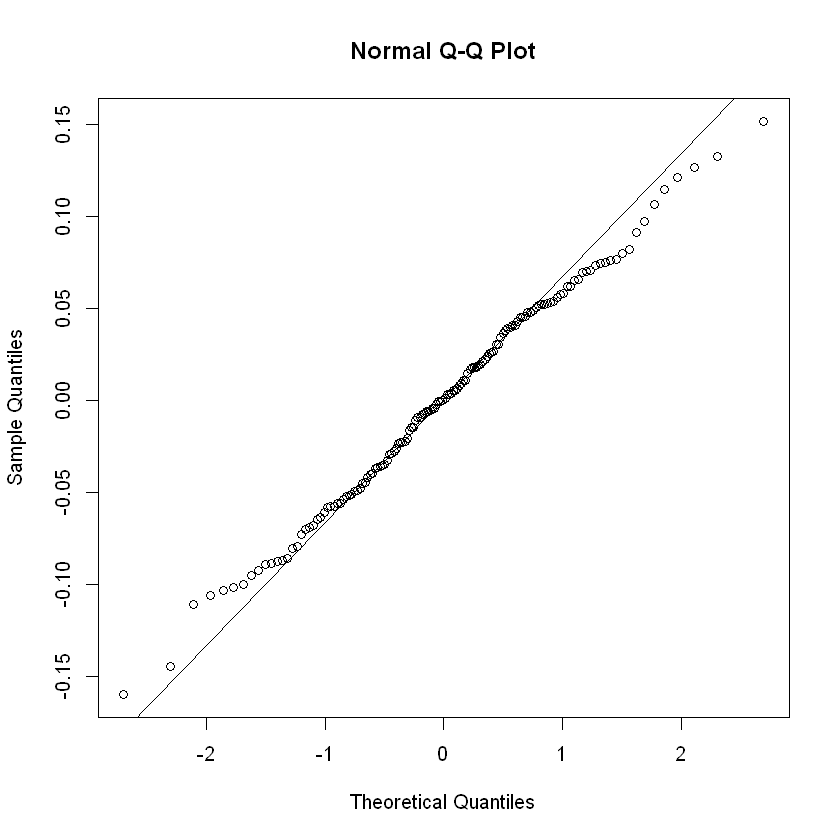

In [368]:
# 정규성 검토
qqnorm(resid(model_31))
qqline(resid(model_31))

오차항의 선형성을 검정하기 위해 T-test를 실시하였더니 유의확률이 1이다. 따라서 $H_0 : \mu = 0 \, vs. H_1 : \mu \neq 0$에서 영가설을 기각하지 못해 잔차의 평균이 0이고, 오차항의 선형성 가정이 만족된다.

오차항의 독립성을 검정하기 위해 Durbin-Watson test(단측검정)를 실시하였더니 DW 통계량이 0.4083, 유의확률이 0.0001이다. 따라서 $H_0 : \rho \leq 0  \, vs. H_1 : \rho > 0$에서 영가설이 기각되어 잔차들 사이에 양의 자기상관관계가 있다. 오차항의 독립성이 위배된다.

오차항의 정규성을 살펴보기 위해 Q-Q plot을 봤더니 대부분의 데이터가 직선과 겹쳐지고 있으므로 오차항의 정규성 가정이 만족된다. 

오차항의 등분산성을 살펴보기 위해 잔차 도표를 살펴보면 0을 중심으로 일정한 범위 내에 움직이고 있다. 따라서 오차항의 등분산성 가정이 만족된 것처럼 보인다.

#### 3-3) 계절지수평활법의 적합과 잔차분석

In [378]:
model_32 = hw(log(usapass) , seasonal = "additive" , h =12 )
model_32$model

Holt-Winters' additive method 

Call:
 hw(y = log(usapass), h = 12, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.7139 
    beta  = 1e-04 
    gamma = 2e-04 

  Initial states:
    l = 4.8268 
    b = 0.0095 
    s = -0.1015 -0.2159 -0.0759 0.0558 0.2052 0.2123
           0.1122 -0.011 -0.0063 0.0218 -0.1123 -0.0843

  sigma:  0.0394

      AIC      AICc       BIC 
-198.7711 -193.9140 -148.2843 

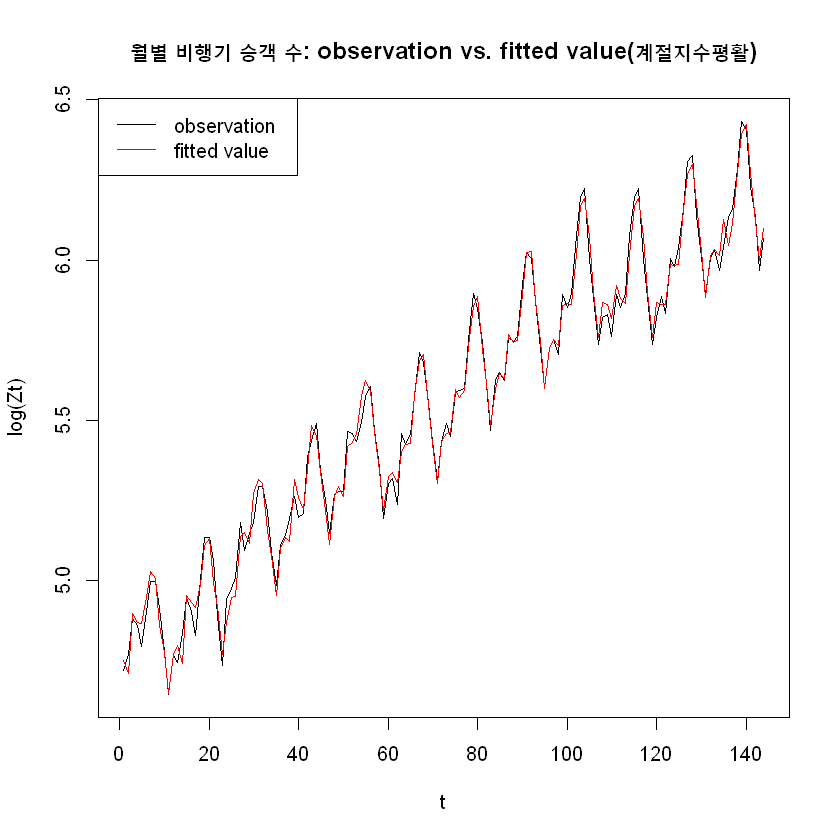

In [382]:
plot(usa_data$log_usapass , type = "l", 
     xlab = "t" , ylab = "log(Zt)" , 
     main = "월별 비행기 승객 수: observation vs. fitted value(계절지수평활)")
lines(as.vector(fitted(model_32)) , col = "red")
legend("topleft",legend=c("observation","fitted value"), lty = 1, col = c("black" , "red")
       ,border="white",box.lty=1,cex=1.0)

이분산성이 있는 데이터를 log변환하였으므로 계절지수평활법의 가법모형으로 적합했다. 
평활 상수는 $\alpha = 0.7139  , \beta = 1e-04 , \gamma = 2e-04$가 사용되었다.
원데이터를 적합값이 너무 잘 따라가고 있다.

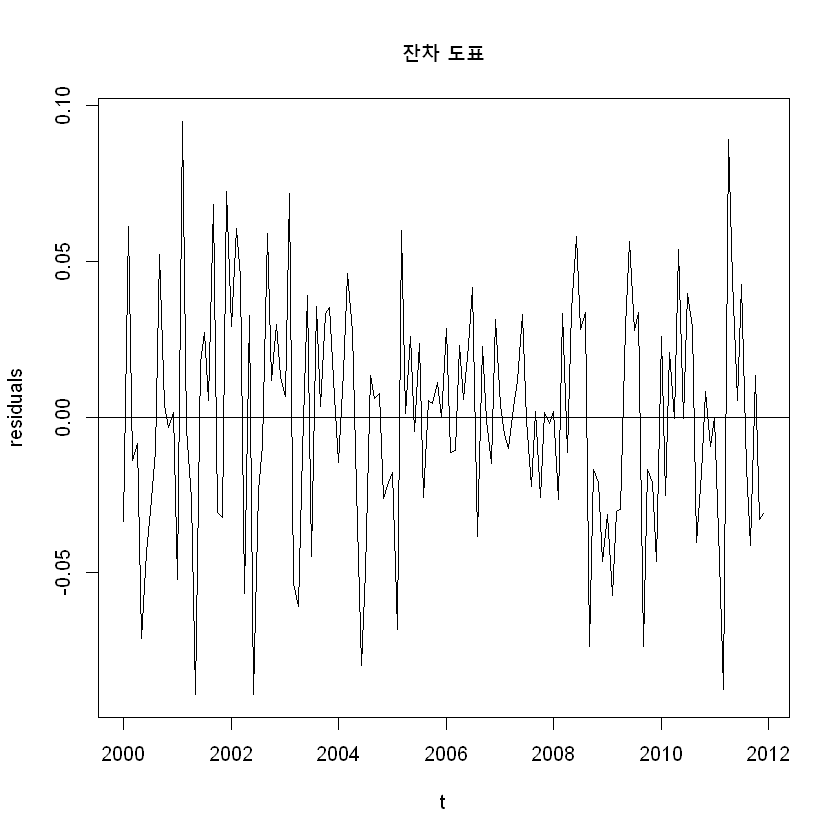

In [383]:
## 잔차 분석 , 등분산성 검토 
plot(usa_data$day , resid(model_32) ,type = "l", 
    xlab = "t" , ylab = "residuals" , main = "잔차 도표")
abline(h = 0)

In [386]:
## 선형성 검정
t.test(resid(model_32)  , mu= 0)


	One Sample t-test

data:  resid(model_32)
t = -0.049052, df = 143, p-value = 0.9609
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.006291011  0.005986348
sample estimates:
    mean of x 
-0.0001523314 


In [388]:
# 독립성 검정
dwtest(lm(resid(model_32) ~1), alternative = "two.sided")


	Durbin-Watson test

data:  lm(resid(model_32) ~ 1)
DW = 1.9031, p-value = 0.5584
alternative hypothesis: true autocorrelation is not 0


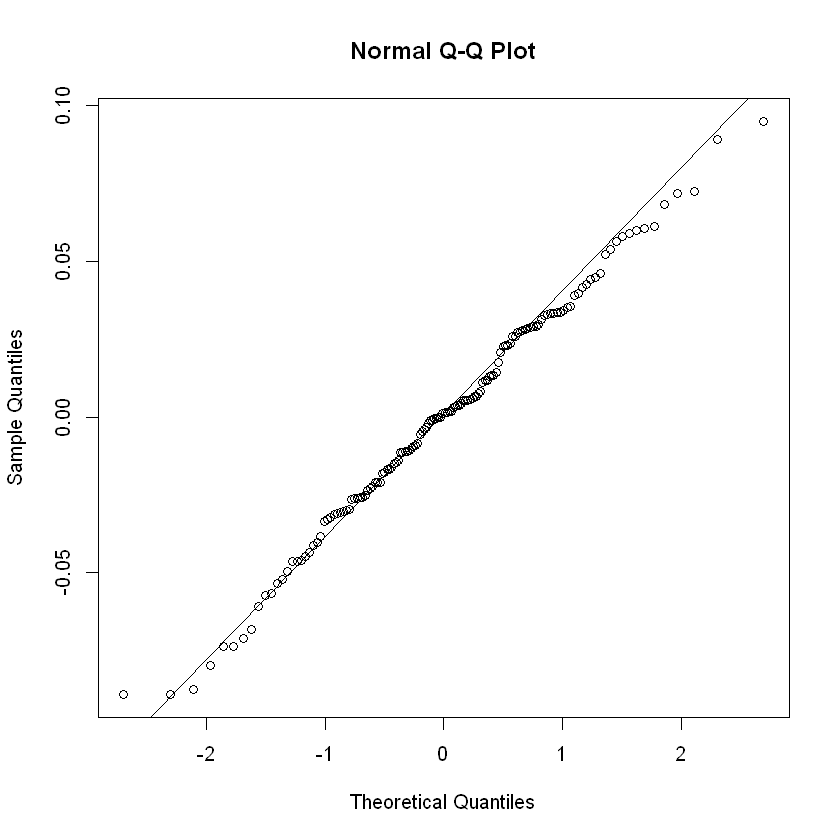

In [389]:
# 정규성 검토
qqnorm(resid(model_32))
qqline(resid(model_32))

오차항의 선형성을 검정하기 위해 T-test를 실시하였더니 유의확률이 0.9609이다. 따라서 $H_0 : \mu = 0 \, vs. H_1 : \mu \neq 0$에서 영가설을 기각하지 못해 잔차의 평균이 0이고, 오차항의 선형성 가정이 만족된다.

오차항의 독립성을 검정하기 위해 Durbin-Watson test(단측검정)를 실시하였더니 DW 통계량이 1.9031, 유의확률이 0.5584 이다. 따라서 $H_0 : \rho = 0  \, vs. H_1 : \rho \neq 0$에서 영가설을 기각하지 못하여 오차항의 독립성 가정이 만족된다.

오차항의 정규성을 살펴보기 위해 Q-Q plot을 봤더니 대부분의 데이터가 직선과 겹쳐지고 있으므로 오차항의 정규성 가정이 만족된다. 

오차항의 등분산성을 살펴보기 위해 잔차 도표를 살펴보면 가운데 부분만 잔차의 범위가 작게 퍼져있고, 양쪽으로 갈수록 잔차가 커지는 양상을 띈다. 따라서 오차항의 등분산성 가정이 위배된 것처럼 보인다.

#### 3-4) 중심이동평균법에 의한 분해법

In [393]:
model_33 = decompose(log(usapass) , 'additive')

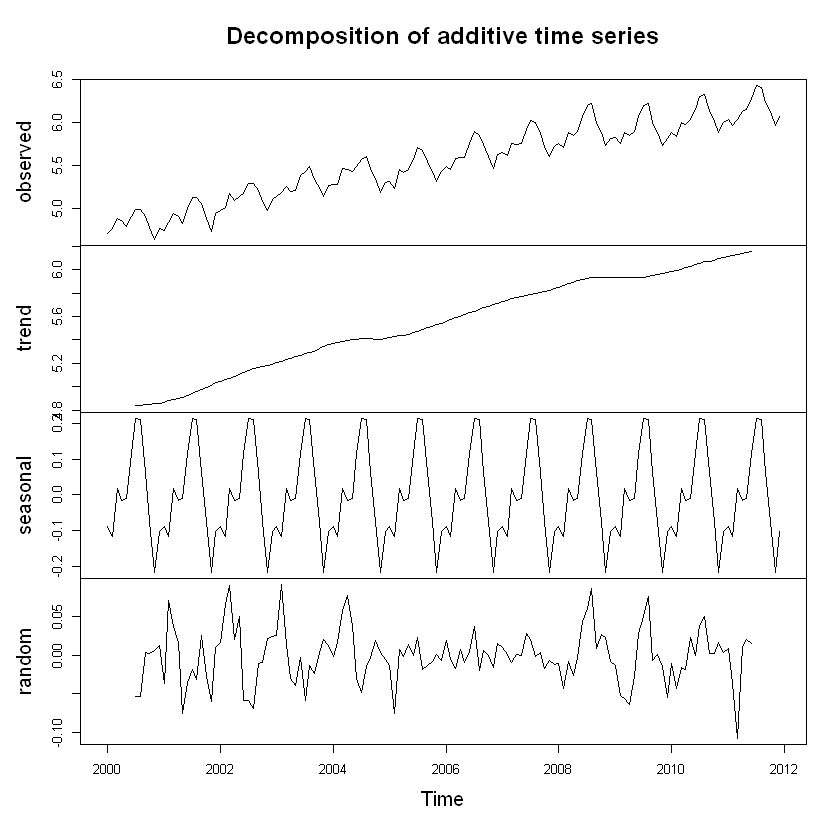

In [396]:
plot(model_33)

window size를 12로 한 중심이동평균을 적용하면 계절성과 불규칙성이 제거되어 $\hat{T_t}$가 추정된다.<br>
{$Z_t - \hat{T_t}$} 에 다른 중심이동평균을 적용하여 불규칙성을 제거하면 $\hat{S_t}$가 추정된다.
그 후 $\hat{I_t} = Z_t - \hat{T_t} - \hat{S_t}$로 불규칙성분까지 분해하여 나온 시계열 도표이다.

#### 3-5) 추정된 불규칙성분 검토

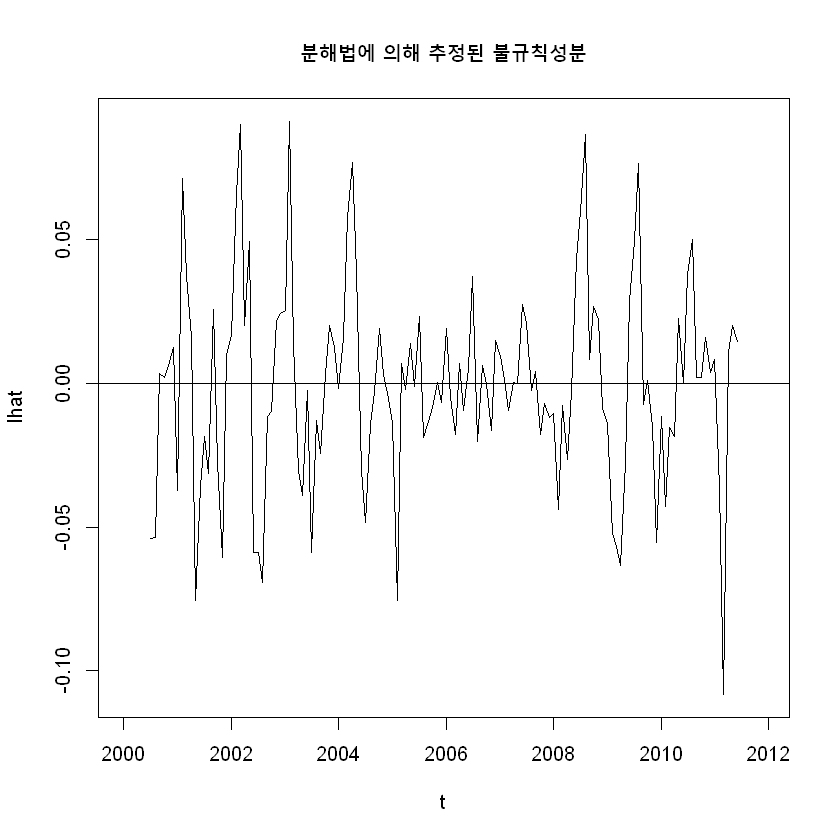

In [403]:
Ihat = model_33$random 

## 추정된 불규칙성분 검토
plot(usa_data$day , Ihat ,type = "l", 
    xlab = "t" , ylab = "Ihat" , main = "분해법에 의해 추정된 불규칙성분")
abline(h = 0)

평균 0을 중심으로 왔다갔다하면서 불규칙성분이 산포되어있다. 그러나 가운데는 분산의 변동폭이 좁고, 왼쪽과 오른쪽은 분산의 폭이 일정한 범위 내에 있다고 볼 수 있다. 국지적으로는 분산이 같지만 global하게는 다르므로 이분산성이 있어보인다. 따라서 각 성분에 관한 체계적 정보가 아직 남아있을지도 모른다. 

----

### 4. 확률과정

#### 4-1) 
$Z_t = 5+ 0.8\times Z_{t-1} + \epsilon_t$, $\epsilon_t \sim WN(0,1)$ 시계열 도표

In [95]:
library(astsa)
set.seed(201822037)
Z= arima.sim(n=100, model = list(order = c(1, 0, 0 ) , ar = 0.8) , rand.gen = rnorm) +25

In [96]:
##
# set.seed(201822037)

#Z = 5/(1-0.8)  ## Z_0 = 25
#e = rnorm(101,0,1) # e_t ~ N(0,1)

#for(i in 2:101){
#    Z[i] = 5 + 0.8*Z[i-1] +e[i]
#    }

#Z = Z[2:101] # t = 1,2, ... , 100
#Z = ts(Z)

[1] "Zt의 평균: 24.867"


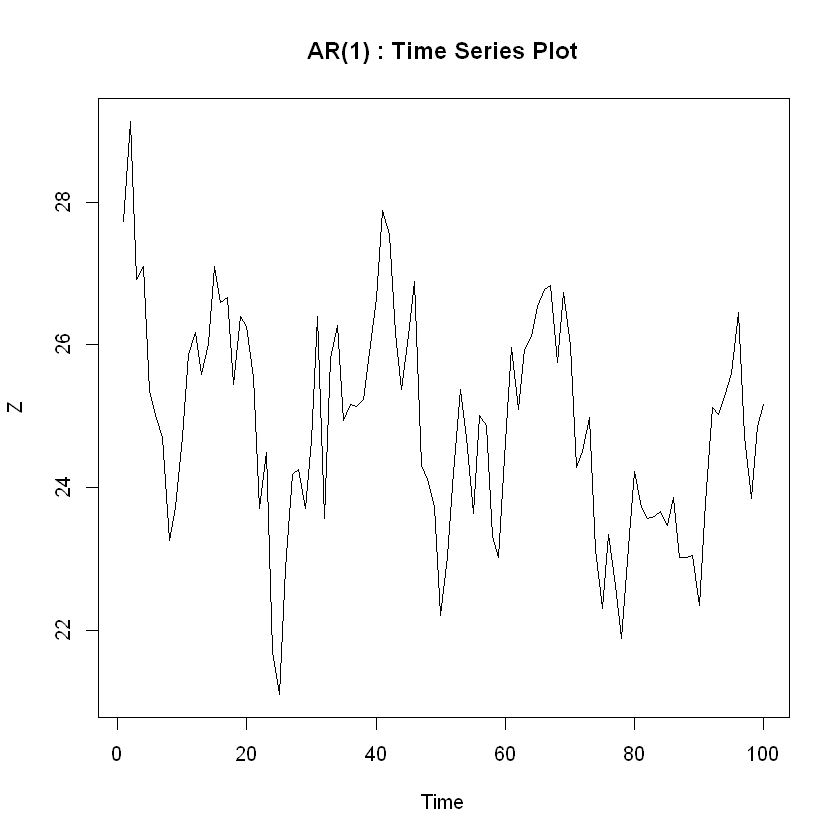

In [97]:
plot(Z , main = "AR(1) : Time Series Plot")
print(paste("Zt의 평균:" ,round(mean(Z),3)))

현재의 데이터가 1-시차 전 과거 관측값의 함수 형태로 나타나는 확률과정이므로 $Z_t$ 는 AR(1) 모형이다.
 $\phi = 0.8$ 이고, 이 데이터의 평균은 이론적으로 25이므로 초기값을 25로 놓았다. 시뮬레이션으로 생성된 데이터의 평균은 24.867이다. 
시계열 도표를 보면 변화의 정도가 심하지 않고 부드러움을 알 수 있다.

#### 4-2) 
SACF $\hat{\rho_k}$ 와 SPACF $\hat{\phi_{kk}}$의 상관도표


Autocorrelations of series 'Z', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.734  0.503  0.414  0.254  0.065 -0.050 -0.067 -0.091 -0.168 -0.129 

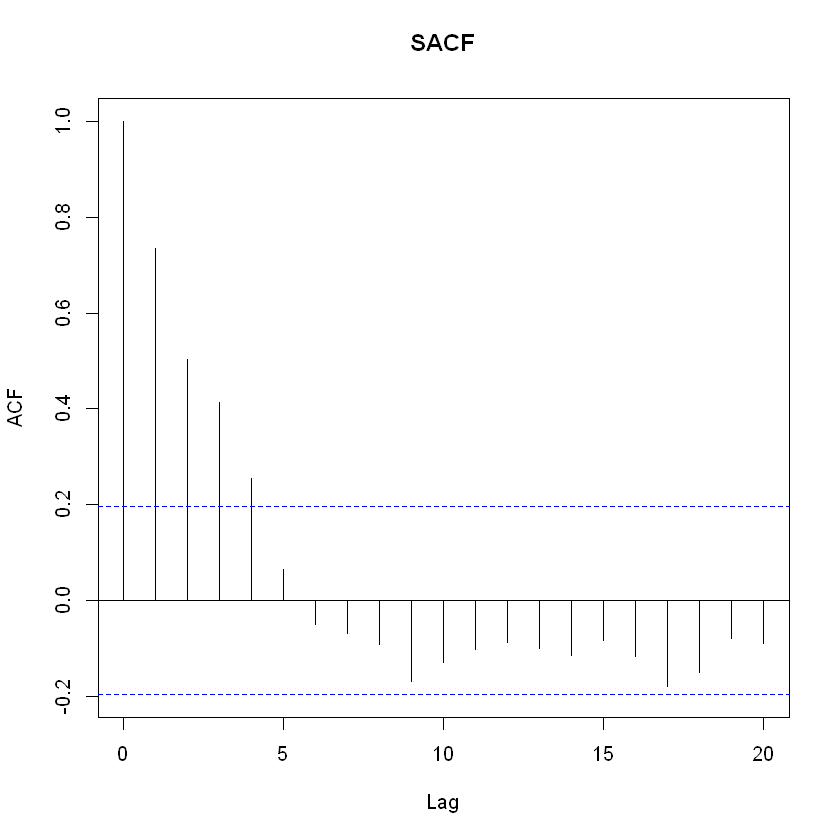

In [98]:
rho = acf(Z , main = "SACF")
rho[1:10]


Partial autocorrelations of series 'Z', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.734 -0.078  0.159 -0.207 -0.134 -0.062  0.095 -0.015 -0.126  0.117 

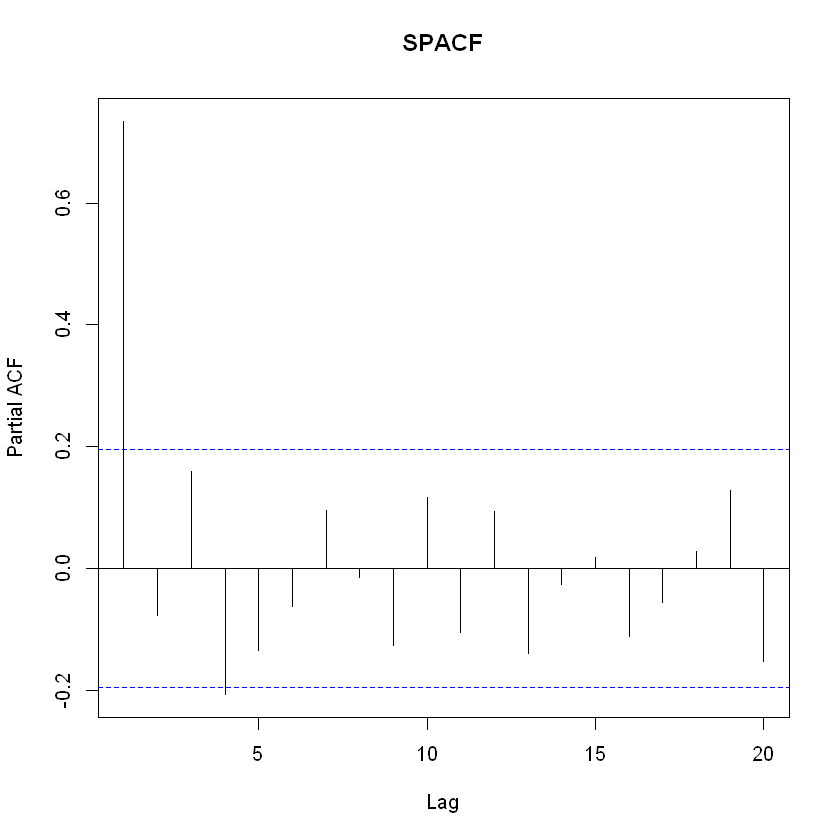

In [99]:
phi = pacf(Z , main = "SPACF")
phi[1:10]

SACF Plot에서 $\hat{\rho_k}$는 k가 커짐에 따라 지수적으로 감소한다. <br>
SPACF Plot에서 $\hat{\phi_{11}}$에서만 유의한 양수값을 가지고 2이상의 시차에서는 $\hat{\phi_{kk}}$의 값이 유의하지 않아 0으로 본다.

#### 4-3) 이론적인 ACF, PACF와의 비교

$Z_t$는 $|\phi| <1$인 AR(1) 모형이므로 정상성 조건을 만족한다. 따라서 이론상 ACF: $\hat{\rho_k} = \phi^k$ , PACF: $\hat{\phi_{11}} = \phi$ ,  $\hat{\phi_{kk}} = 0 , k \geq 2$ 이다.  

<center> SACF 
    
|k | 1 | 2| 3| 4| 5| 6|7|8|9|10|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|이론 | 0.80|0.640|0.512 |0.41 | 0.328 | 0.262 | 0.21 | 0.168 | 0.134 | 0.107 |
|simulation|0.734 | 0.503 | 0.414 | 0.254 | 0.065 |-0.050 |-0.067 |-0.091 |-0.168 |-0.129 |
 
    
<center> SPACF 
    
|k | 1 | 2| 3| 4| 5| 6|7|8|9|10|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|이론 | 0.8|0 |0 |0 | 0 | 0 | 0 | 0 | 0 | 0 |
|simulation| 0.734 |-0.078|  0.159 |-0.207| -0.134| -0.062|  0.095| -0.015| -0.126|  0.117| 
 
$\hat{\rho_k}$ 이론과 simulation의 값은 다르나 k=5까지 부호가 양수로 같고 각 값이 지수적으로 감소하고 있는 것은 동일하다. <br>
$\hat{\phi_{kk}}$이론과 simulation의 값은 다르나 $\hat{\phi_{11}}$은 0.8근처로 simulation이 이론값과 비슷하고 simulation에서 나머지 값들은 유의하지 않다는 점에서 0으로 볼 수 있으므로 이론값과 비슷하다.

In [110]:
rho_hat = round(0.8**(1:10) , 3)
rho_hat
rho[1:10]

[1] 0.800 0.640 0.512 0.410 0.328 0.262 0.210 0.168 0.134 0.107


Autocorrelations of series 'Z', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.734  0.503  0.414  0.254  0.065 -0.050 -0.067 -0.091 -0.168 -0.129 

In [108]:
phi_hat = c(0.8 , rep(0,9))
phi_hat
phi[1:10]

[1] 0.8 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


Partial autocorrelations of series 'Z', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.734 -0.078  0.159 -0.207 -0.134 -0.062  0.095 -0.015 -0.126  0.117 

#### 4-4) 표본 증가 , ACF, PACF의 비교

In [112]:
set.seed(201822037)
Z2= arima.sim(n=10000, model = list(order = c(1, 0, 0 ) , ar = 0.8) , rand.gen = rnorm) +25


Autocorrelations of series 'Z', by lag

    1     2     3     4     5     6     7     8     9    10 
0.802 0.633 0.496 0.386 0.301 0.238 0.186 0.137 0.098 0.066 

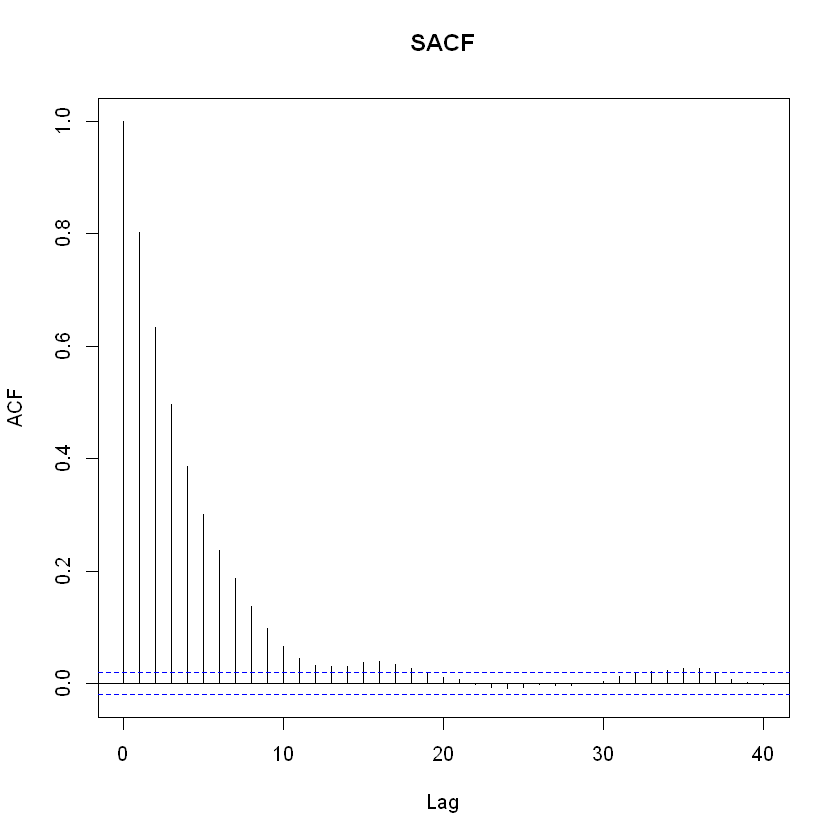


Partial autocorrelations of series 'Z', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.802 -0.029 -0.008 -0.007  0.002  0.008 -0.004 -0.026 -0.002 -0.012 

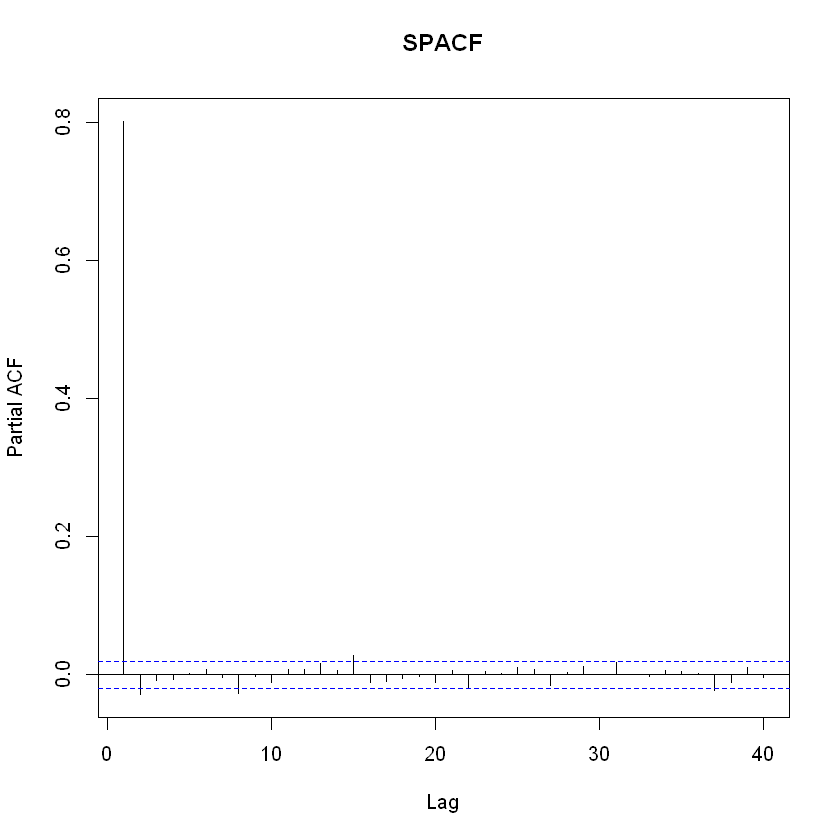

In [114]:
rho2 = acf(Z , main = "SACF")
rho2[1:10]

phi2 = pacf(Z , main = "SPACF")
phi2[1:10]

In [115]:
rho_hat = round(0.8**(1:10) , 3)
rho_hat
rho2[1:10]

[1] 0.800 0.640 0.512 0.410 0.328 0.262 0.210 0.168 0.134 0.107


Autocorrelations of series 'Z', by lag

    1     2     3     4     5     6     7     8     9    10 
0.802 0.633 0.496 0.386 0.301 0.238 0.186 0.137 0.098 0.066 

In [116]:
phi_hat = c(0.8 , rep(0,9))
phi_hat
phi2[1:10]

[1] 0.8 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


Partial autocorrelations of series 'Z', by lag

     1      2      3      4      5      6      7      8      9     10 
 0.802 -0.029 -0.008 -0.007  0.002  0.008 -0.004 -0.026 -0.002 -0.012 

<center> SACF 
    
|k | 1 | 2| 3| 4| 5| 6|7|8|9|10|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|이론 | 0.80|0.640|0.512 |0.41 | 0.328 | 0.262 | 0.21 | 0.168 | 0.134 | 0.107 |
|simulation|0.802| 0.633| 0.496| 0.386| 0.301| 0.238 |0.186 |0.137| 0.098| 0.066| 
 
    
<center> SPACF 
    
|k | 1 | 2| 3| 4| 5| 6|7|8|9|10|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|이론 | 0.8|0 |0 |0 | 0 | 0 | 0 | 0 | 0 | 0 |
|simulation| 0.802| -0.029| -0.008| -0.007 | 0.002|  0.008 |-0.004| -0.026 | -0.002| -0.012| 
    
표본의 크기를 10000으로 증가시켰더니 simulation에서 $\hat{\rho_k}$ , $\hat{\phi_{kk}}$의 값이 이론적인 $\hat{\rho_k}$ , $\hat{\phi_{kk}}$의 값에 매우 근사되었다.